# Gender Classification Neural Network


## 1 - Packages

In [2]:
import numpy as np


import matplotlib.pyplot as plt
from dnn_app_utils_v3 import *
import random

np.random.seed(1)


## 2 - Initialization

All of our images have been saved into a h5-file. Let's read the data from the h5 file and save it into train, test and dev variables.

In [3]:
    
train_x, train_y, test_x, test_y, dev_x, dev_y= load_data()
print("SIZE OF EACH IMAGE" + str(train_x[2].shape))

print("The train set has " + str(train_x.shape[0]) + " images.")

print("The test set has "  + str(test_x.shape[0]) + " images.")

print("The dev set has " + str(dev_x.shape[0]) + " images.")


SIZE OF EACH IMAGE(80, 114, 3)
The train set has 926 images.
The test set has 199 images.
The dev set has 84 images.


#### Run the code below to see the tenth picture from the training set!

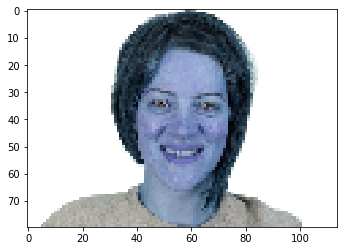

In [4]:
plt.imshow(dev_x[10].astype('int'))

#### Now let's reshape the dev, train and test sets so that each column represents one whole image. After this, let's standardize all pixel values to be between 0 and 1. 

In [5]:
if len(train_x.shape) > 2:
    train_x_flatten = train_x.reshape(train_x.shape[0], -1).T  
    test_x_flatten = test_x.reshape(test_x.shape[0], -1).T
    dev_x_flatten = dev_x.reshape(dev_x.shape[0], -1).T

    # Standardize data to have feature values between 0 and 1.
    train_x = train_x_flatten/255.
    test_x = test_x_flatten/255.
    dev_x = dev_x_flatten/255

print("The shape of the train set is: " + str(train_x.shape))
print("The shape of the test set is: " + str(test_x.shape))
print("The shape of the dev set is: " + str(dev_x.shape))
   


The shape of the train set is: (27360, 926)
The shape of the test set is: (27360, 199)
The shape of the dev set is: (27360, 84)


## 3 - The Neural Network
 
First, we initialize our network. 
We start by defining a network architecture of the following shape:  

- Input layer: 27360 neurons
- 1st layer: 20 neurons
- 2nd layer: 7 neurons
- 3rd layer: 5 neurons
- Output layer: 1 neuron


In [6]:
layers_dims = [27360, 30, 18, 15, 7, 5, 1]

Next, we define a function which trains the neural network. It is the same one we have used in class, except it takes an additional DEV set as input and counts the loss every 100th iteration.

In [7]:
def L_layer_model(X, Y, DEV, layers_dims, learning_rate = 0.0075, num_iterations = 3000):

    print("Working with network structure: " + str(layers_dims))
    print("Learning rate: " + str(learning_rate))
    print("Number of iterations: " + str(num_iterations))
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ##
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###

        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            dev_AL, caches = L_model_forward(DEV["x"], parameters)
            devcost = compute_cost(dev_AL, DEV["y"])
            print("Dev cost afer iteration %i: %f" %(i, devcost))
        if i % 100 == 0:
            costs.append(cost)
      
            
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
 
    
    return parameters

Now, we are ready to train the network!

Let's start with parameters: 
- num_iterations: 1000
- learning_rate: 0.075

###### Run the code below to see the results. It takes a while.

Working with network structure: [27360, 30, 18, 15, 7, 5, 1]
Learning rate: 0.075
Number of iterations: 1000
Cost after iteration 0: 0.694830
Dev cost afer iteration 0: 0.624870
Cost after iteration 100: 0.660433
Dev cost afer iteration 100: 0.635094
Cost after iteration 200: 0.637538
Dev cost afer iteration 200: 0.634929
Cost after iteration 300: 0.691866
Dev cost afer iteration 300: 0.666406
Cost after iteration 400: 0.691693
Dev cost afer iteration 400: 0.671749
Cost after iteration 500: 0.691689
Dev cost afer iteration 500: 0.672581
Cost after iteration 600: 0.691689
Dev cost afer iteration 600: 0.672708
Cost after iteration 700: 0.691689
Dev cost afer iteration 700: 0.672727
Cost after iteration 800: 0.691689
Dev cost afer iteration 800: 0.672730
Cost after iteration 900: 0.691689
Dev cost afer iteration 900: 0.672730
Predicting train set....
Accuracy: 0.5269978401727862

Predicting test set....
Accuracy: 0.4924623115577891

Predicting dev set....
Accuracy: 0.7023809523809522


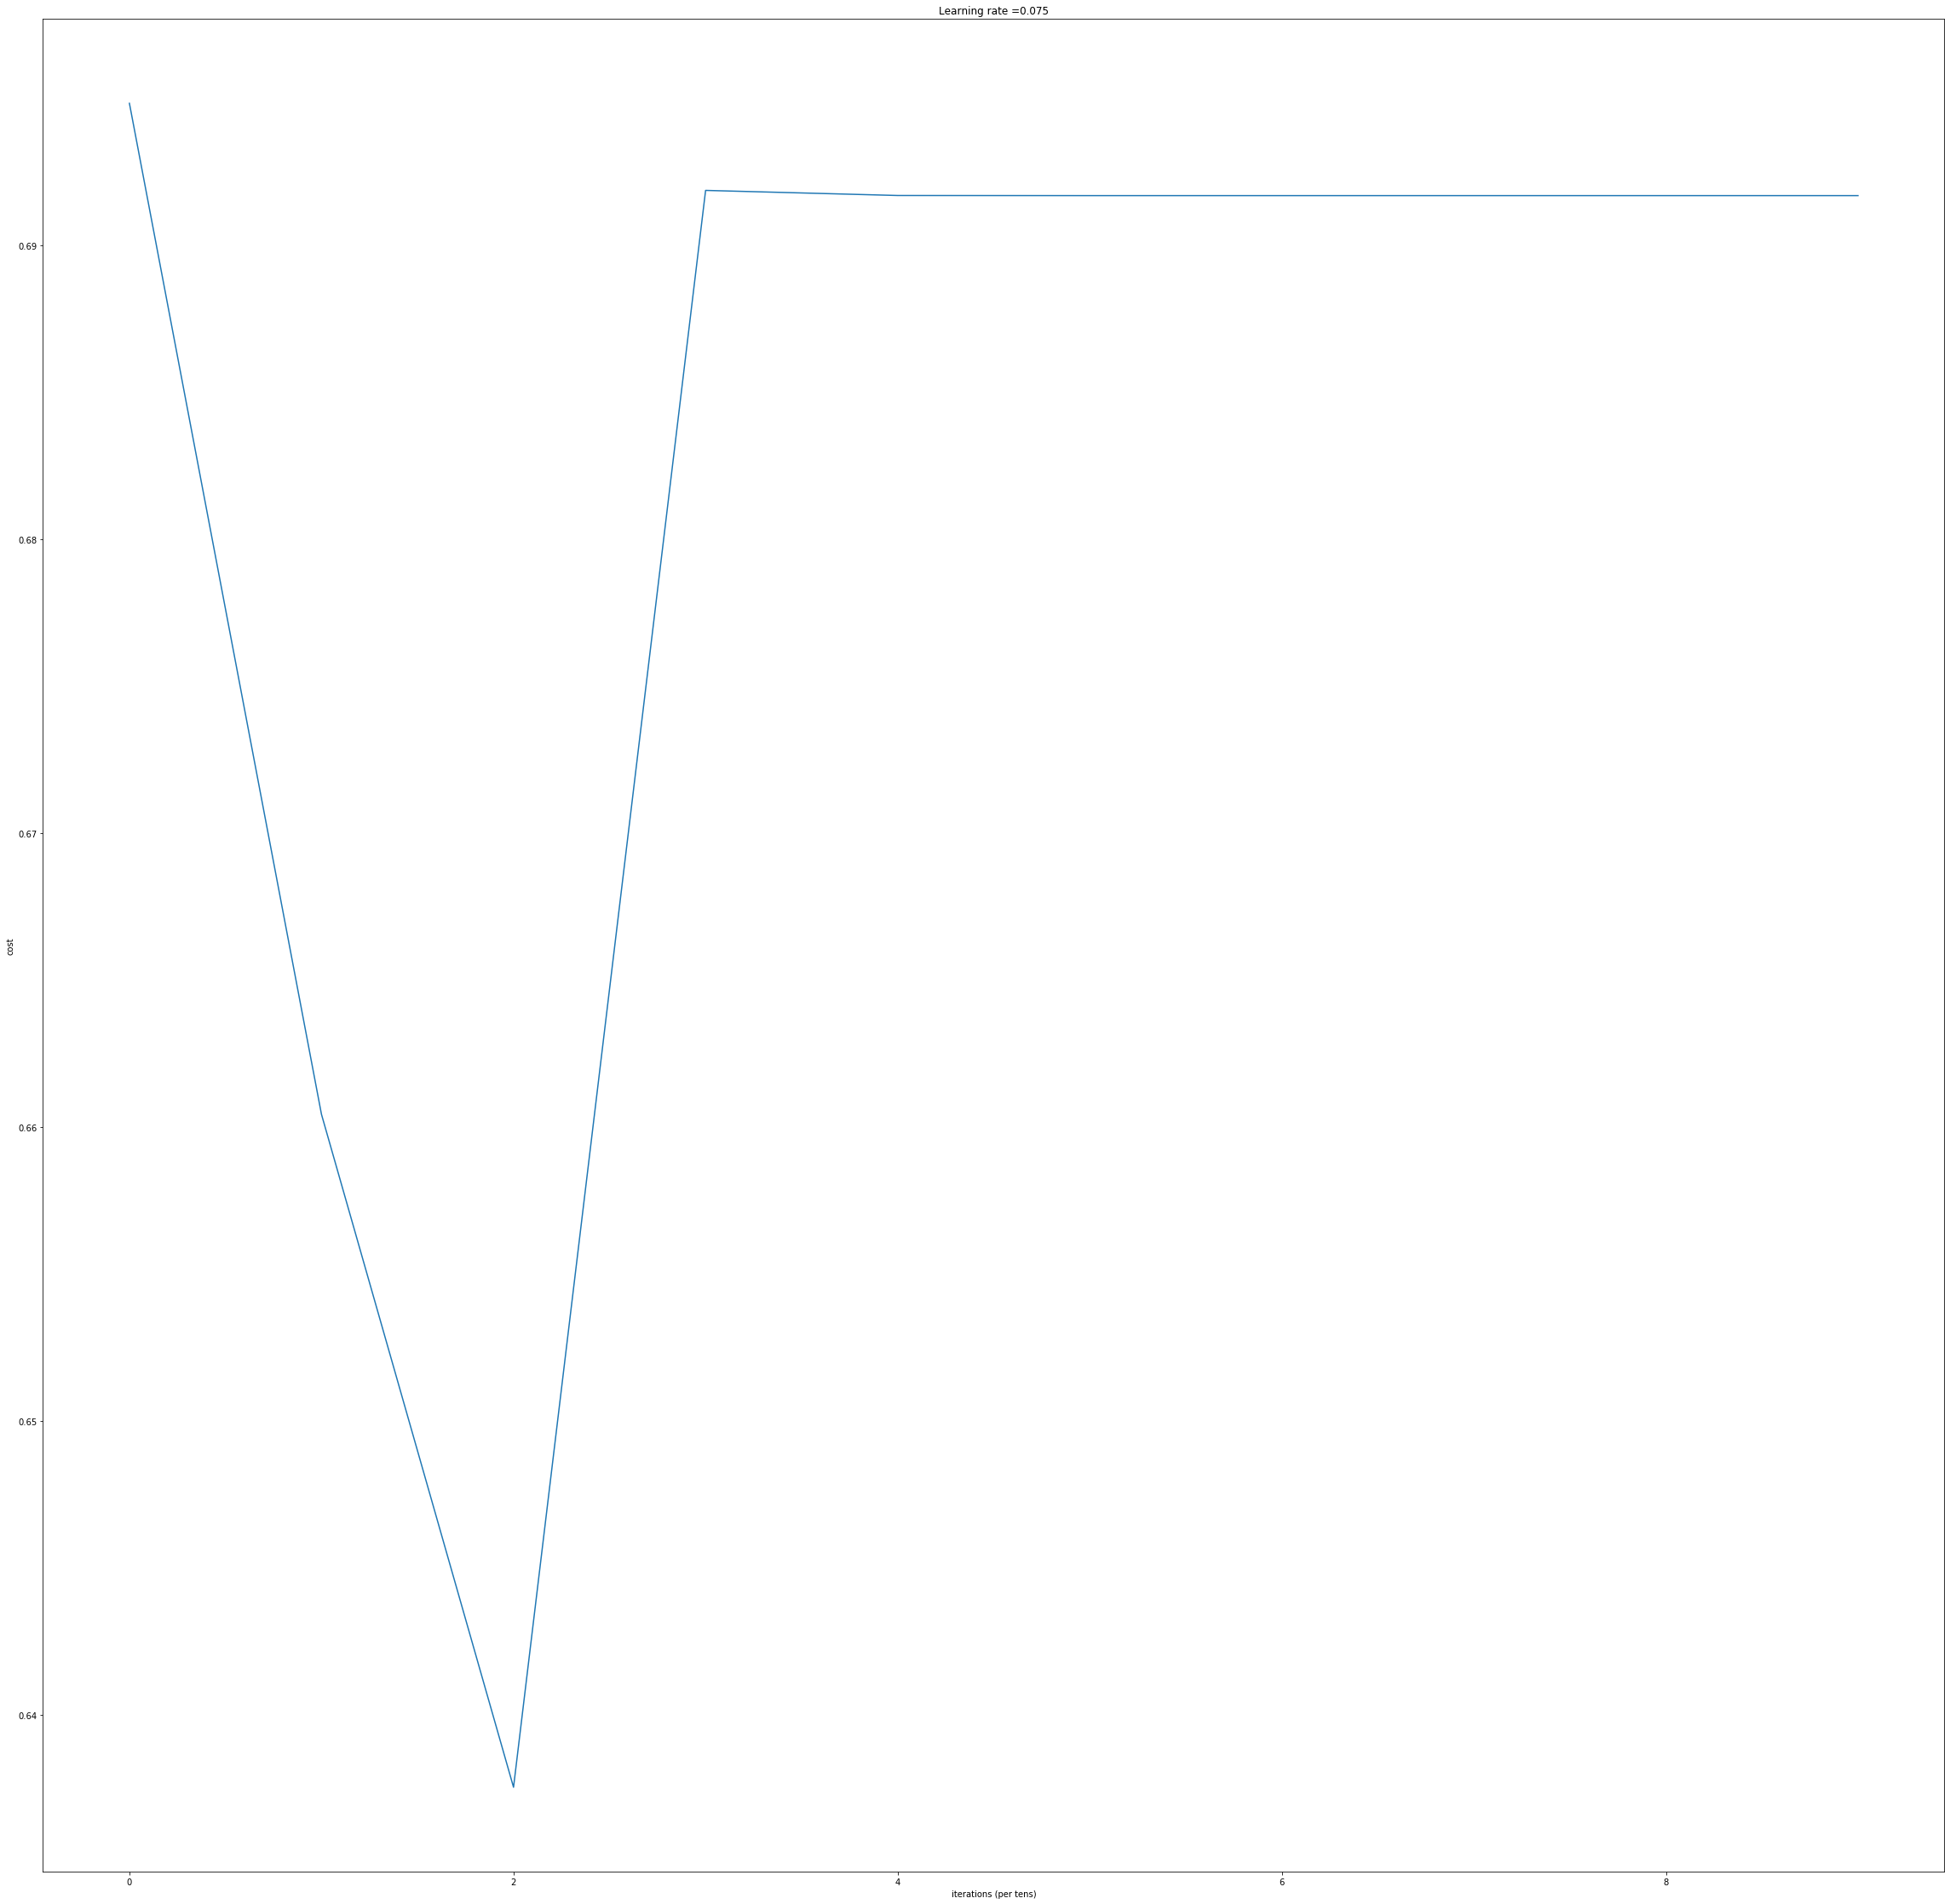

In [18]:
parameters = L_layer_model(train_x, train_y, {"x": dev_x, "y": dev_y} , layers_dims, learning_rate=0.075, num_iterations = 1000)

print("Predicting train set....")
predictions_train = predict(train_x, train_y, parameters)

print("\nPredicting test set....")
predictions_test = predict(test_x, test_y, parameters)

print("\nPredicting dev set....")
predictions_dev = predict(dev_x, dev_y, parameters)



### Results: 
After iterating 1000 times, we see that: <br />

- Train accuracy is 0.5269978401727862
- Test accuracy is 0.4924623115577891
- Dev accuracy is 0.7023809523809522

What horrible results! We have worse test results than guessing 50/50 on the test set...

## 4 - Improving the Results

#### Updating the learning rate
The learning rate is very high. This is causing the parameters to change too much into the direction of the gradient... Let's change the learning rate to 0.0075.

Working with network structure: [27360, 30, 18, 15, 7, 5, 1]
Learning rate: 0.0075
Number of iterations: 1000
Cost after iteration 0: 0.694830
Dev cost afer iteration 0: 0.661043
Cost after iteration 100: 0.578687
Dev cost afer iteration 100: 0.488264
Cost after iteration 200: 0.567686
Dev cost afer iteration 200: 0.516385
Cost after iteration 300: 0.640533
Dev cost afer iteration 300: 0.627184
Cost after iteration 400: 0.550840
Dev cost afer iteration 400: 0.509190
Cost after iteration 500: 0.592310
Dev cost afer iteration 500: 0.614092
Cost after iteration 600: 0.491898
Dev cost afer iteration 600: 0.381614
Cost after iteration 700: 0.516528
Dev cost afer iteration 700: 0.381482
Cost after iteration 800: 0.505061
Dev cost afer iteration 800: 0.664054
Cost after iteration 900: 0.530185
Dev cost afer iteration 900: 0.500037
Predicting train set....
Accuracy: 0.7300215982721383

Predicting test set....
Accuracy: 0.6733668341708545

Predicting dev set....
Accuracy: 0.583333333333333


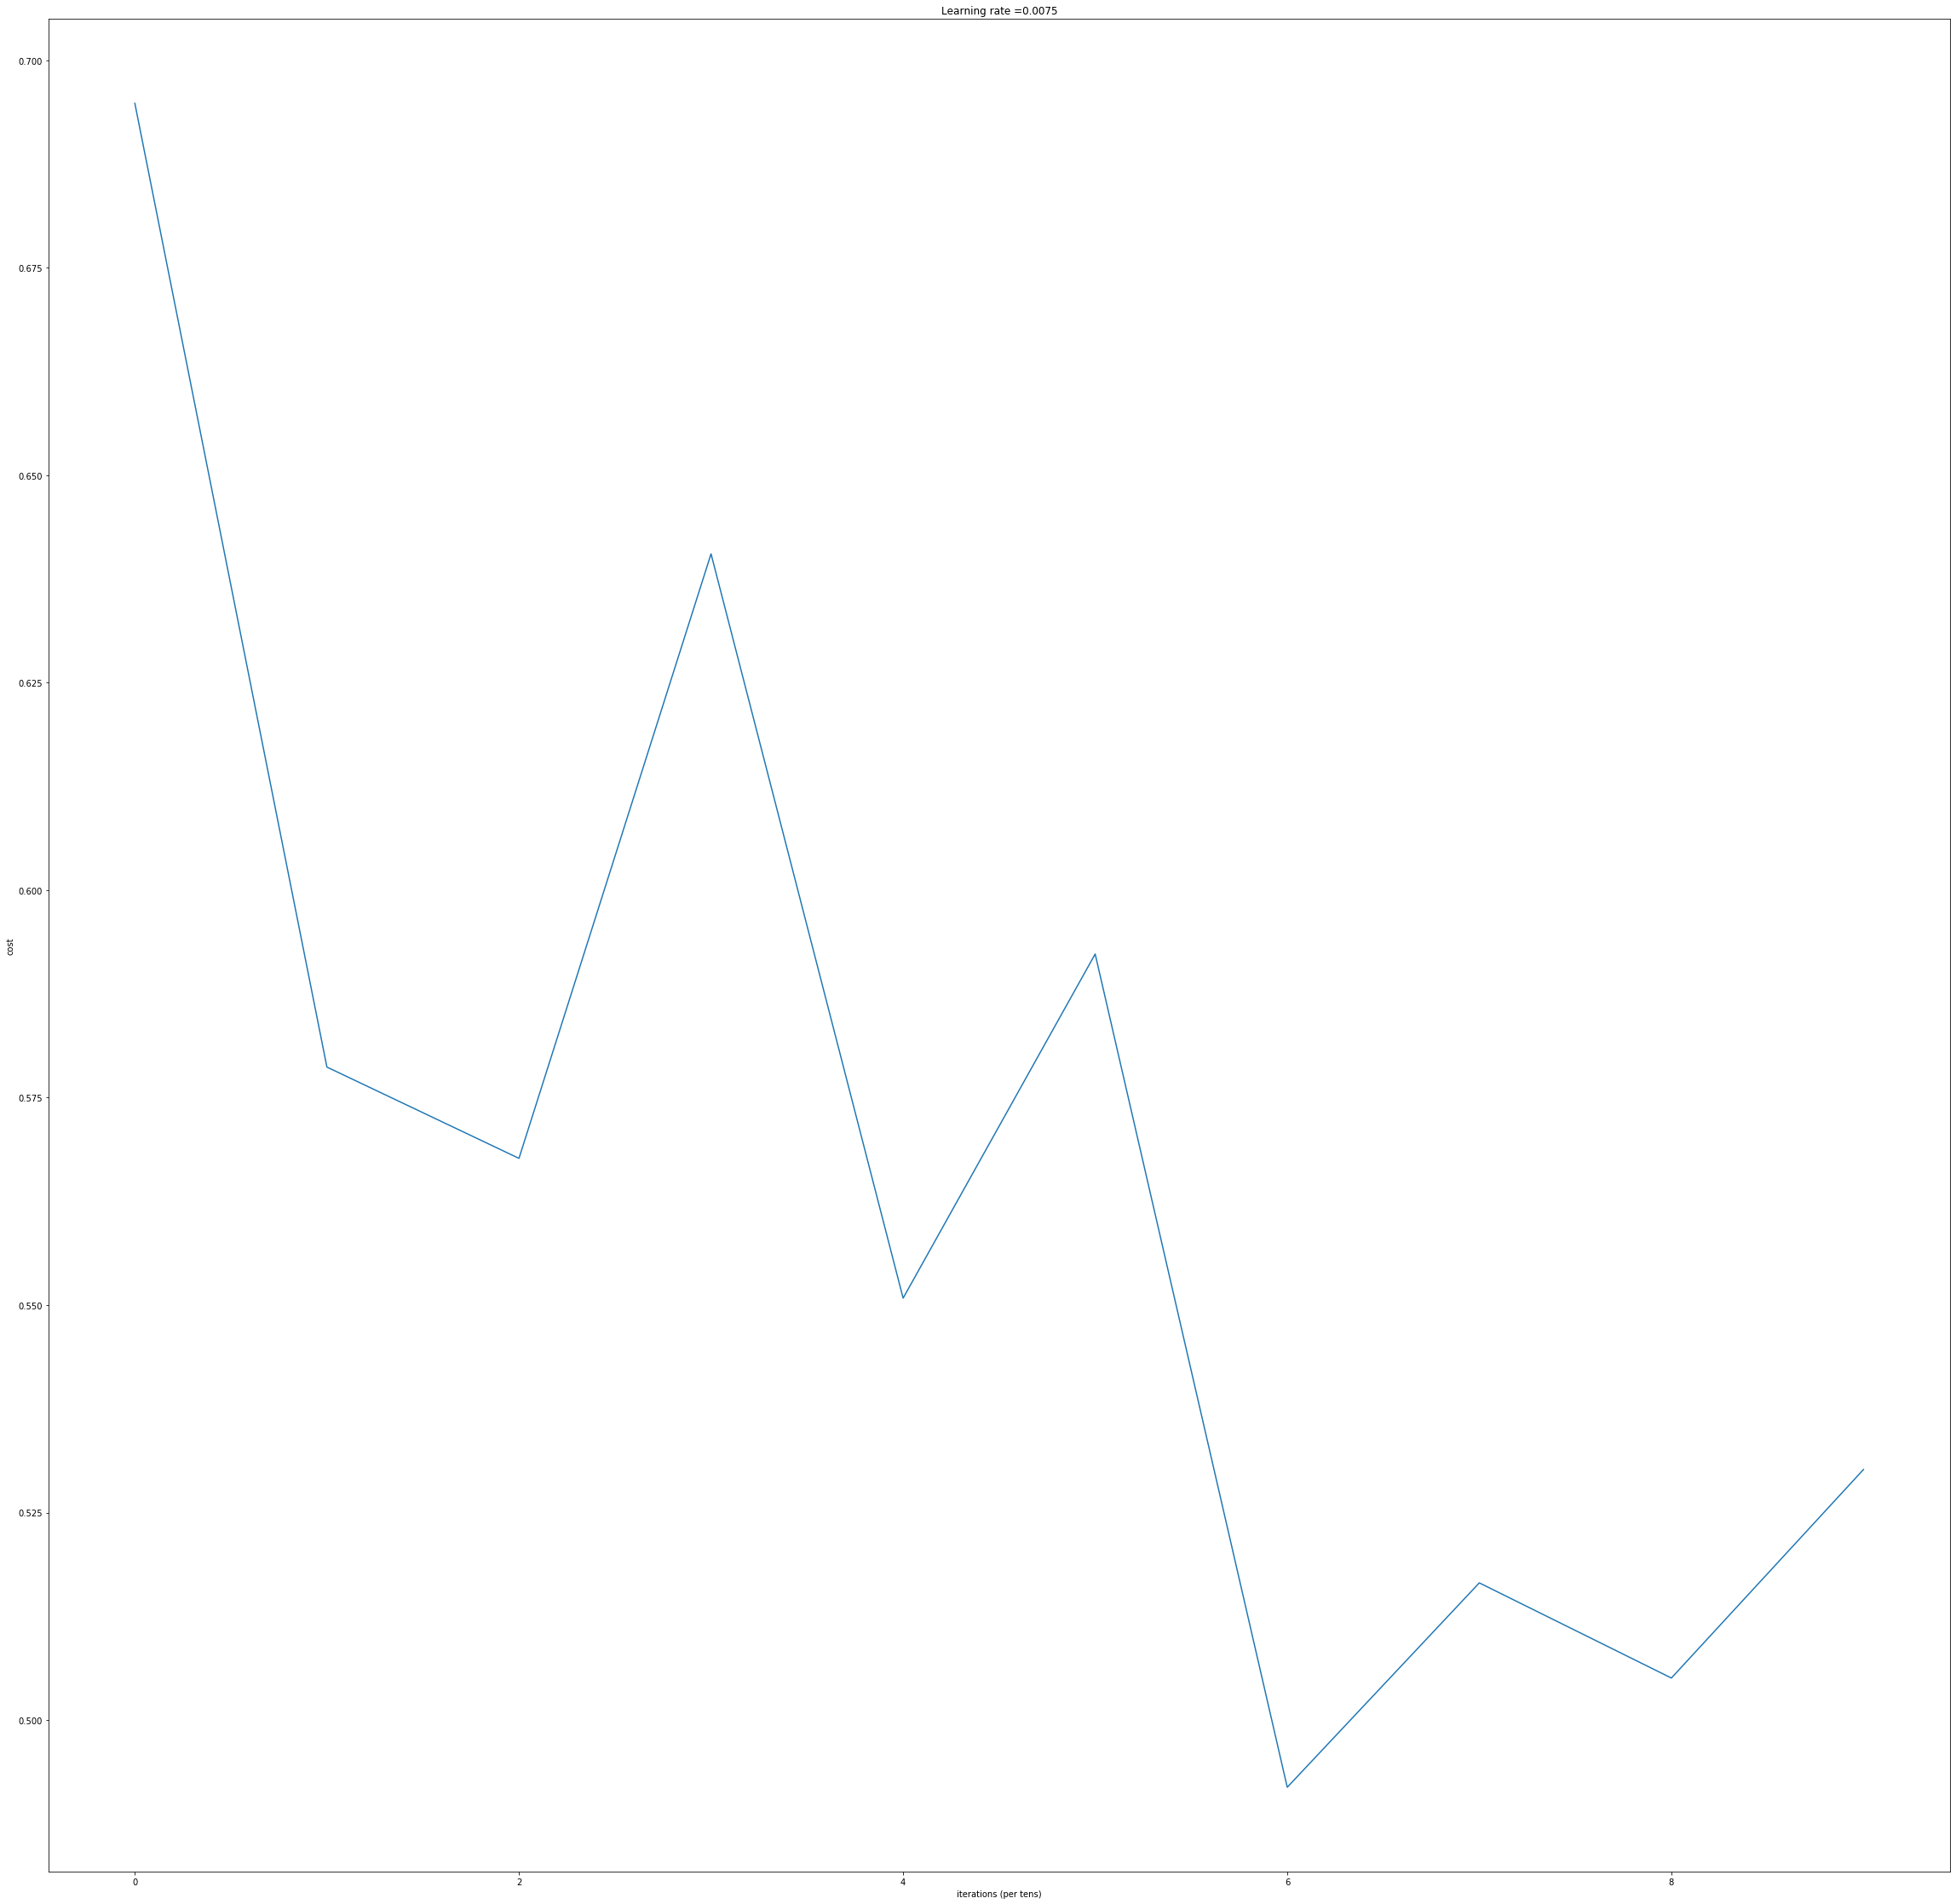

In [20]:
parameters = L_layer_model(train_x, train_y, {"x": dev_x, "y": dev_y} , layers_dims, learning_rate = 0.0075, num_iterations = 1000)

print("Predicting train set....")
predictions_train = predict(train_x, train_y, parameters)

print("\nPredicting test set....")
predictions_test = predict(test_x, test_y, parameters)

print("\nPredicting dev set....")
predictions_dev = predict(dev_x, dev_y, parameters)



As we can see: 
- Train accuracy is 0.7300215982721383
- **Test accuracy is 0.6733668341708545**
- Dev accuracy is 0.583333333333333

#### Updating the number of iterations

Since we still have high bias, let's train for longer and set the number of iterations to 2500.

Working with network structure: [27360, 30, 18, 15, 7, 5, 1]
Learning rate: 0.0075
Number of iterations: 2500
Cost after iteration 0: 0.694830
Dev cost afer iteration 0: 0.661043
Cost after iteration 100: 0.578687
Dev cost afer iteration 100: 0.488264
Cost after iteration 200: 0.567686
Dev cost afer iteration 200: 0.516385
Cost after iteration 300: 0.640533
Dev cost afer iteration 300: 0.627184
Cost after iteration 400: 0.550840
Dev cost afer iteration 400: 0.509190
Cost after iteration 500: 0.592310
Dev cost afer iteration 500: 0.614092
Cost after iteration 600: 0.491898
Dev cost afer iteration 600: 0.381614
Cost after iteration 700: 0.516528
Dev cost afer iteration 700: 0.381482
Cost after iteration 800: 0.505061
Dev cost afer iteration 800: 0.664054
Cost after iteration 900: 0.530185
Dev cost afer iteration 900: 0.500037
Cost after iteration 1000: 0.518779
Dev cost afer iteration 1000: 0.434044
Cost after iteration 1100: 0.434983
Dev cost afer iteration 1100: 0.609158
Cost after ite

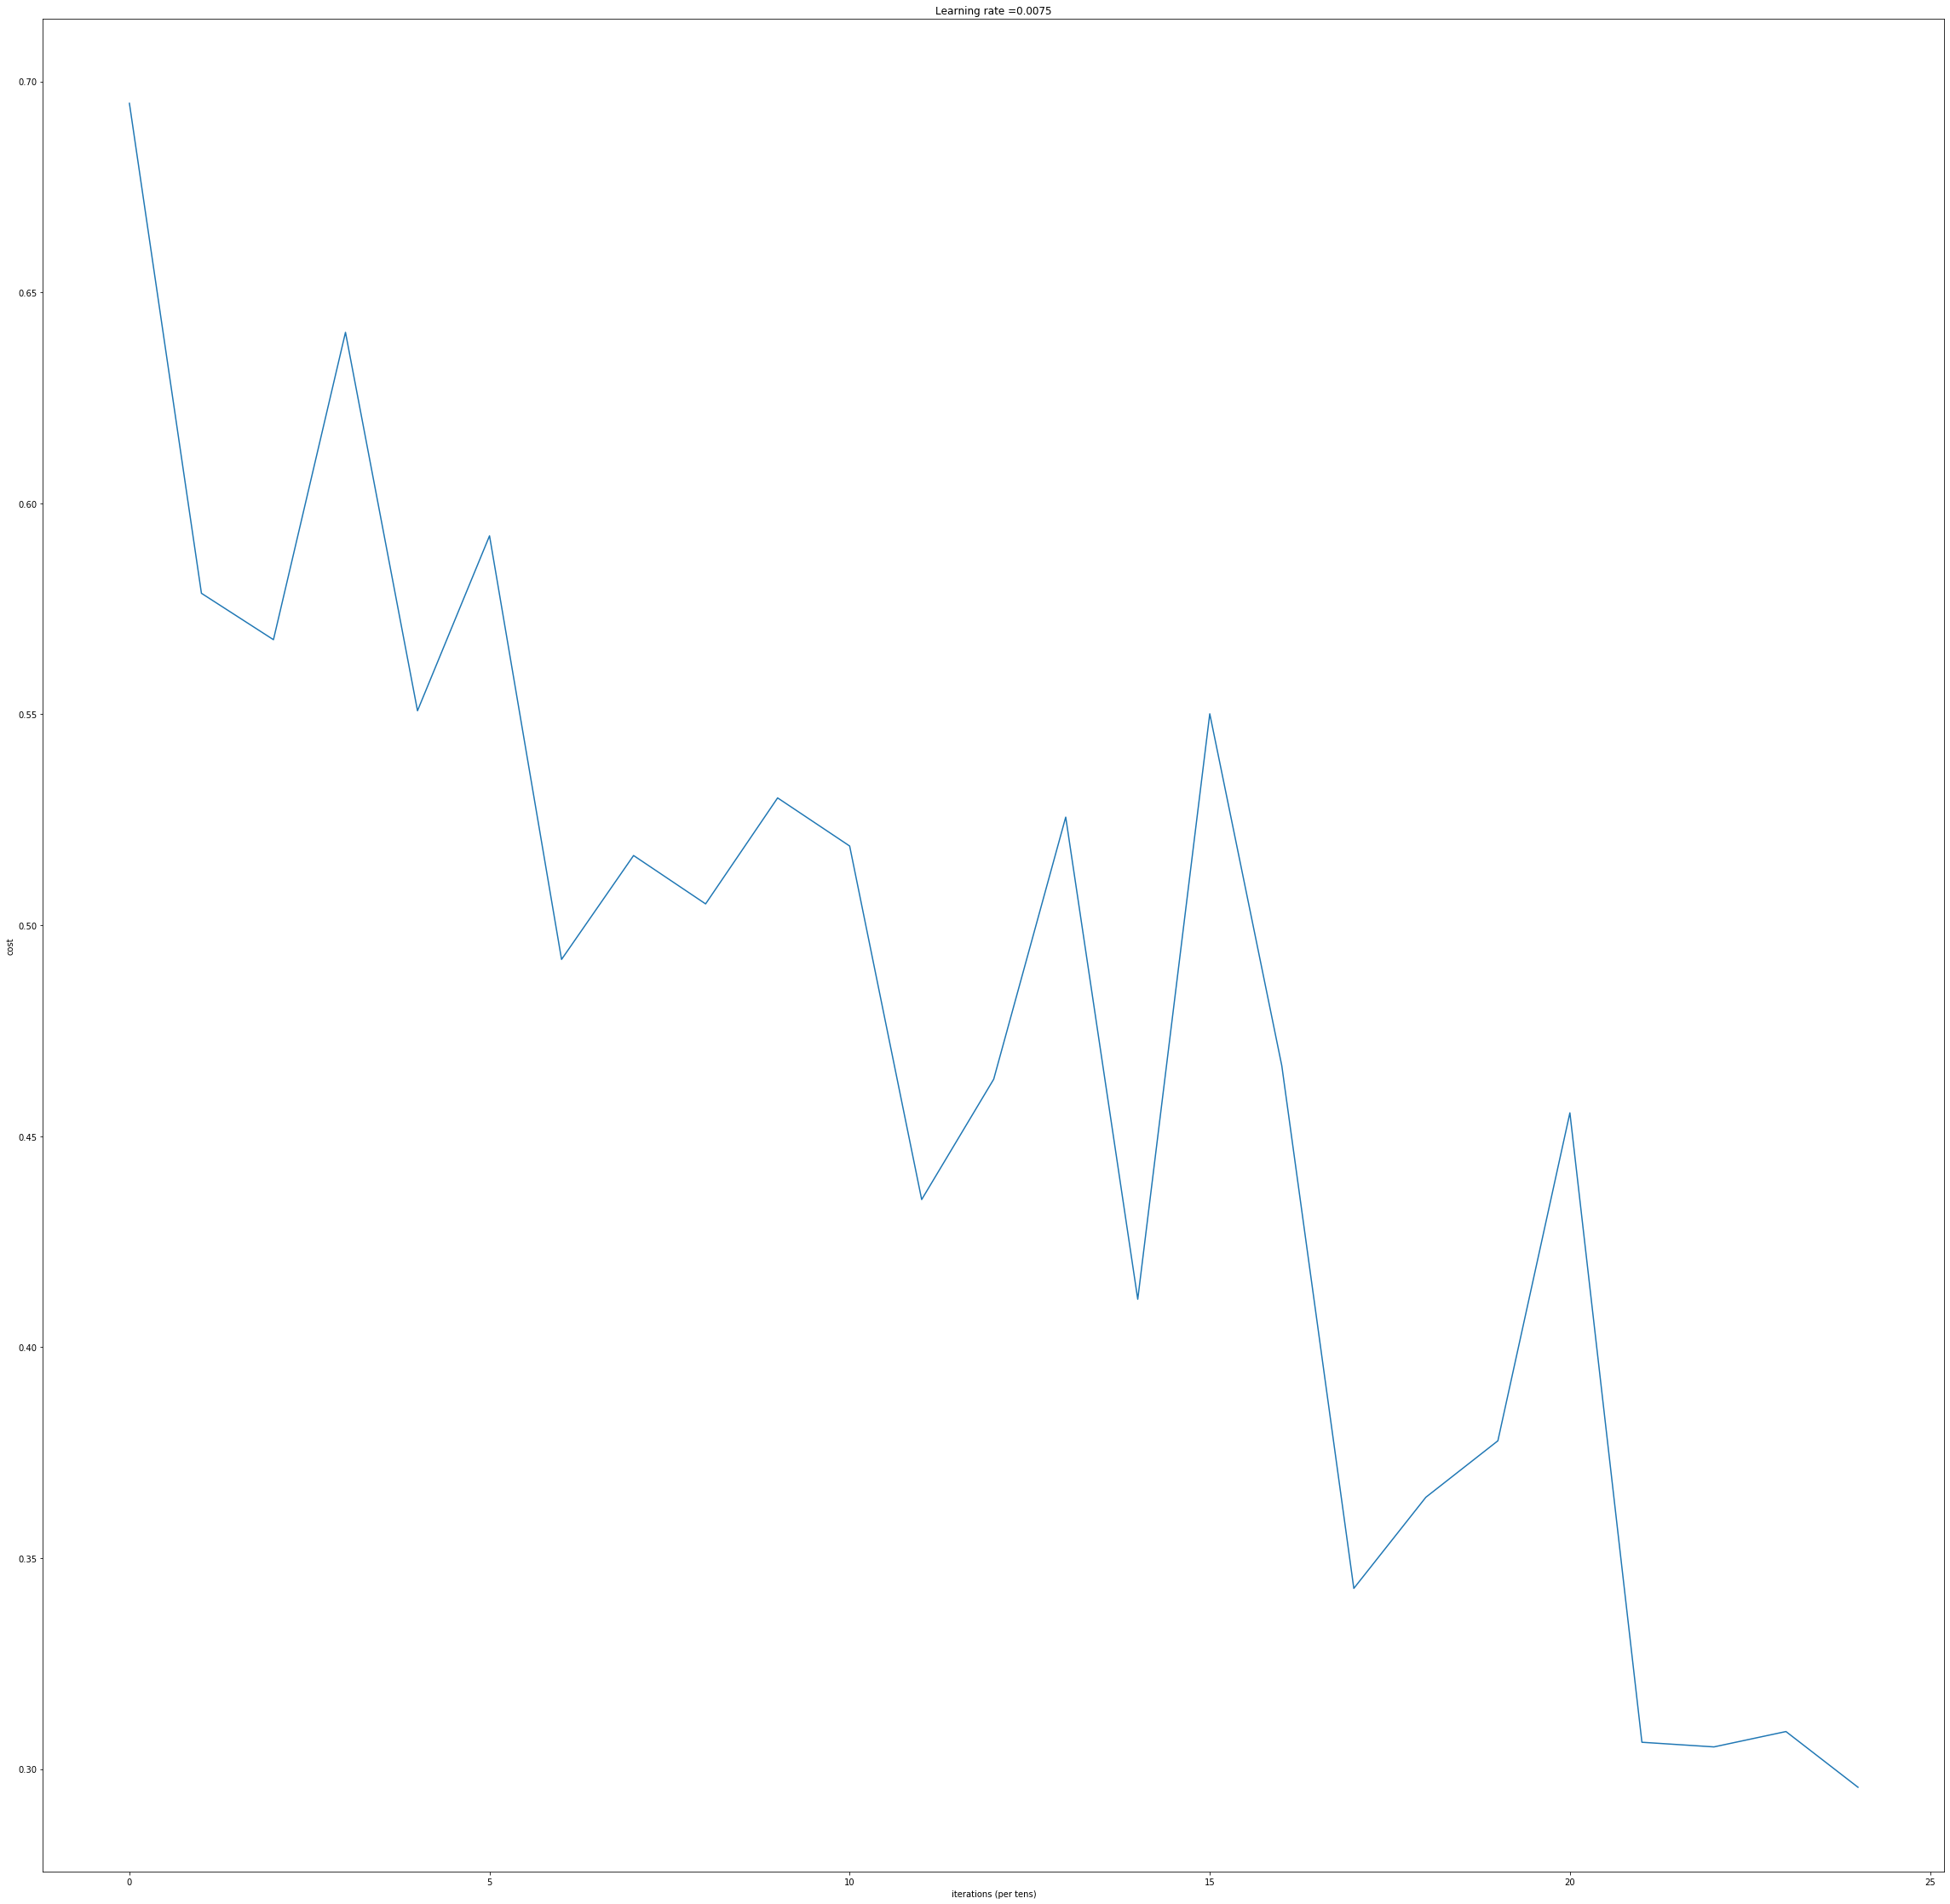

In [21]:
parameters = L_layer_model(train_x, train_y, {"x": dev_x, "y": dev_y} , layers_dims, learning_rate = 0.0075, num_iterations = 2500)

print("Predicting train set....")
predictions_train = predict(train_x, train_y, parameters)

print("\nPredicting test set....")
predictions_test = predict(test_x, test_y, parameters)

print("\nPredicting dev set....")
predictions_dev = predict(dev_x, dev_y, parameters)


As we see:
- Train accuracy is 0.9082073434125268
- **Test accuracy is 0.8542713567839197**
- Dev acuracy is 0.9166666666666664

Since we are concentrating on the test accuracy to determine the accuracy of our network, let's try to get it up and aim for an error of 10%. We will accept this error as the images are blurry and because humans may have facial features which resemble those of the opposite sex.

Let's go for training with a smaller learning rate, since we can see that the cost is swininging uncontrollably. Let's try learning rate 0.003.

Working with network structure: [27360, 30, 18, 15, 7, 5, 1]
Learning rate: 0.003
Number of iterations: 2500
Cost after iteration 0: 0.694830
Dev cost afer iteration 0: 0.662613
Cost after iteration 100: 0.614499
Dev cost afer iteration 100: 0.589007
Cost after iteration 200: 0.567403
Dev cost afer iteration 200: 0.541011
Cost after iteration 300: 0.548759
Dev cost afer iteration 300: 0.556555
Cost after iteration 400: 0.576290
Dev cost afer iteration 400: 0.527477
Cost after iteration 500: 0.505004
Dev cost afer iteration 500: 0.554822
Cost after iteration 600: 0.525495
Dev cost afer iteration 600: 0.405222
Cost after iteration 700: 0.608662
Dev cost afer iteration 700: 0.616141
Cost after iteration 800: 0.484235
Dev cost afer iteration 800: 0.368747
Cost after iteration 900: 0.426272
Dev cost afer iteration 900: 0.360684
Cost after iteration 1000: 0.423589
Dev cost afer iteration 1000: 0.347981
Cost after iteration 1100: 0.500946
Dev cost afer iteration 1100: 0.353232
Cost after iter

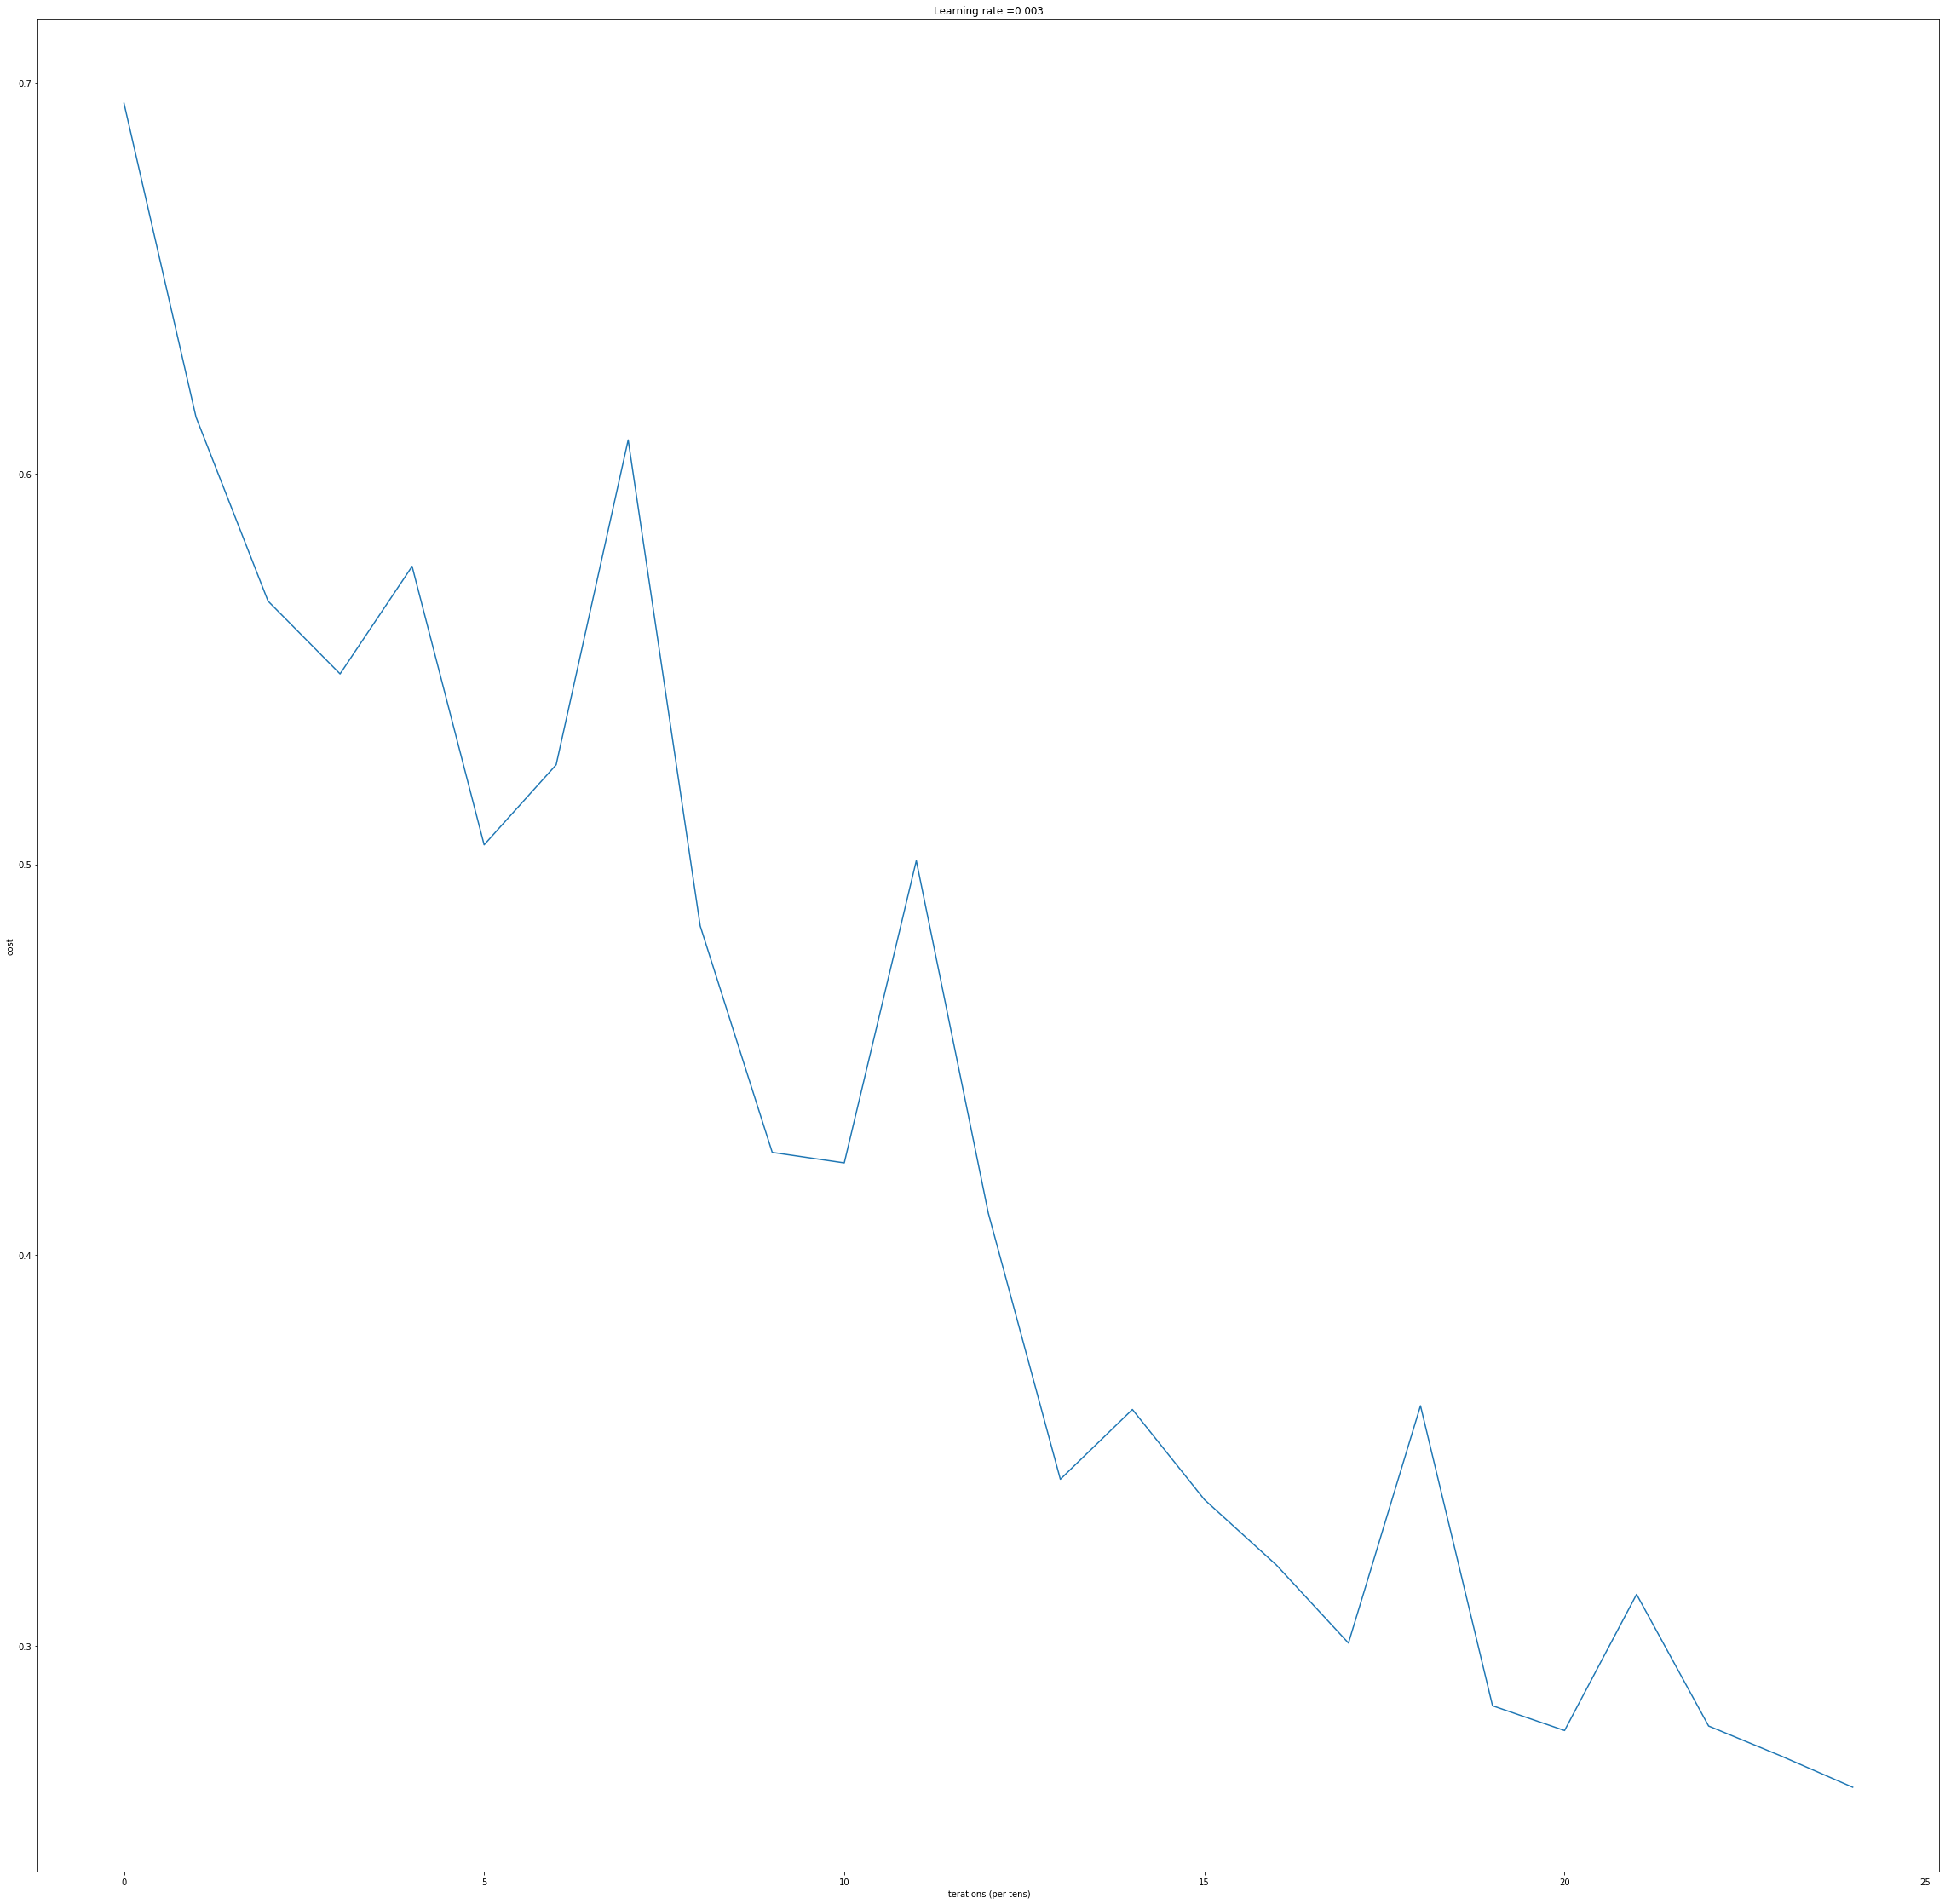

In [22]:


parameters = L_layer_model(train_x, train_y, {"x": dev_x, "y": dev_y} , layers_dims, learning_rate = 0.003, num_iterations = 2500)

print("Predicting train set....")
predictions_train = predict(train_x, train_y, parameters)

print("\nPredicting test set....")
predictions_test = predict(test_x, test_y, parameters)

print("\nPredicting dev set....")
predictions_dev = predict(dev_x, dev_y, parameters)

#print_mislabeled_images(["female", "male"], test_x, test_y, predictions_test)


- Train accuracy is: 0.8974082073434124
- Test accuracy is: 0.8190954773869348
- Dev accuracy is: 0.8690476190476188

#### Updating number of iterations
The learning smaller learning rate seems to result in a steadier decrease in cost, let's train for longer (3500 iterations) to see if we get better results.

Working with network structure: [27360, 30, 18, 15, 7, 5, 1]
Learning rate: 0.003
Number of iterations: 3500
Cost after iteration 0: 0.694830
Dev cost afer iteration 0: 0.662613
Cost after iteration 100: 0.614499
Dev cost afer iteration 100: 0.589007
Cost after iteration 200: 0.567403
Dev cost afer iteration 200: 0.541011
Cost after iteration 300: 0.548759
Dev cost afer iteration 300: 0.556555
Cost after iteration 400: 0.576290
Dev cost afer iteration 400: 0.527477
Cost after iteration 500: 0.505004
Dev cost afer iteration 500: 0.554822
Cost after iteration 600: 0.525495
Dev cost afer iteration 600: 0.405222
Cost after iteration 700: 0.608662
Dev cost afer iteration 700: 0.616141
Cost after iteration 800: 0.484235
Dev cost afer iteration 800: 0.368747
Cost after iteration 900: 0.426272
Dev cost afer iteration 900: 0.360684
Cost after iteration 1000: 0.423589
Dev cost afer iteration 1000: 0.347981
Cost after iteration 1100: 0.500946
Dev cost afer iteration 1100: 0.353232
Cost after iter

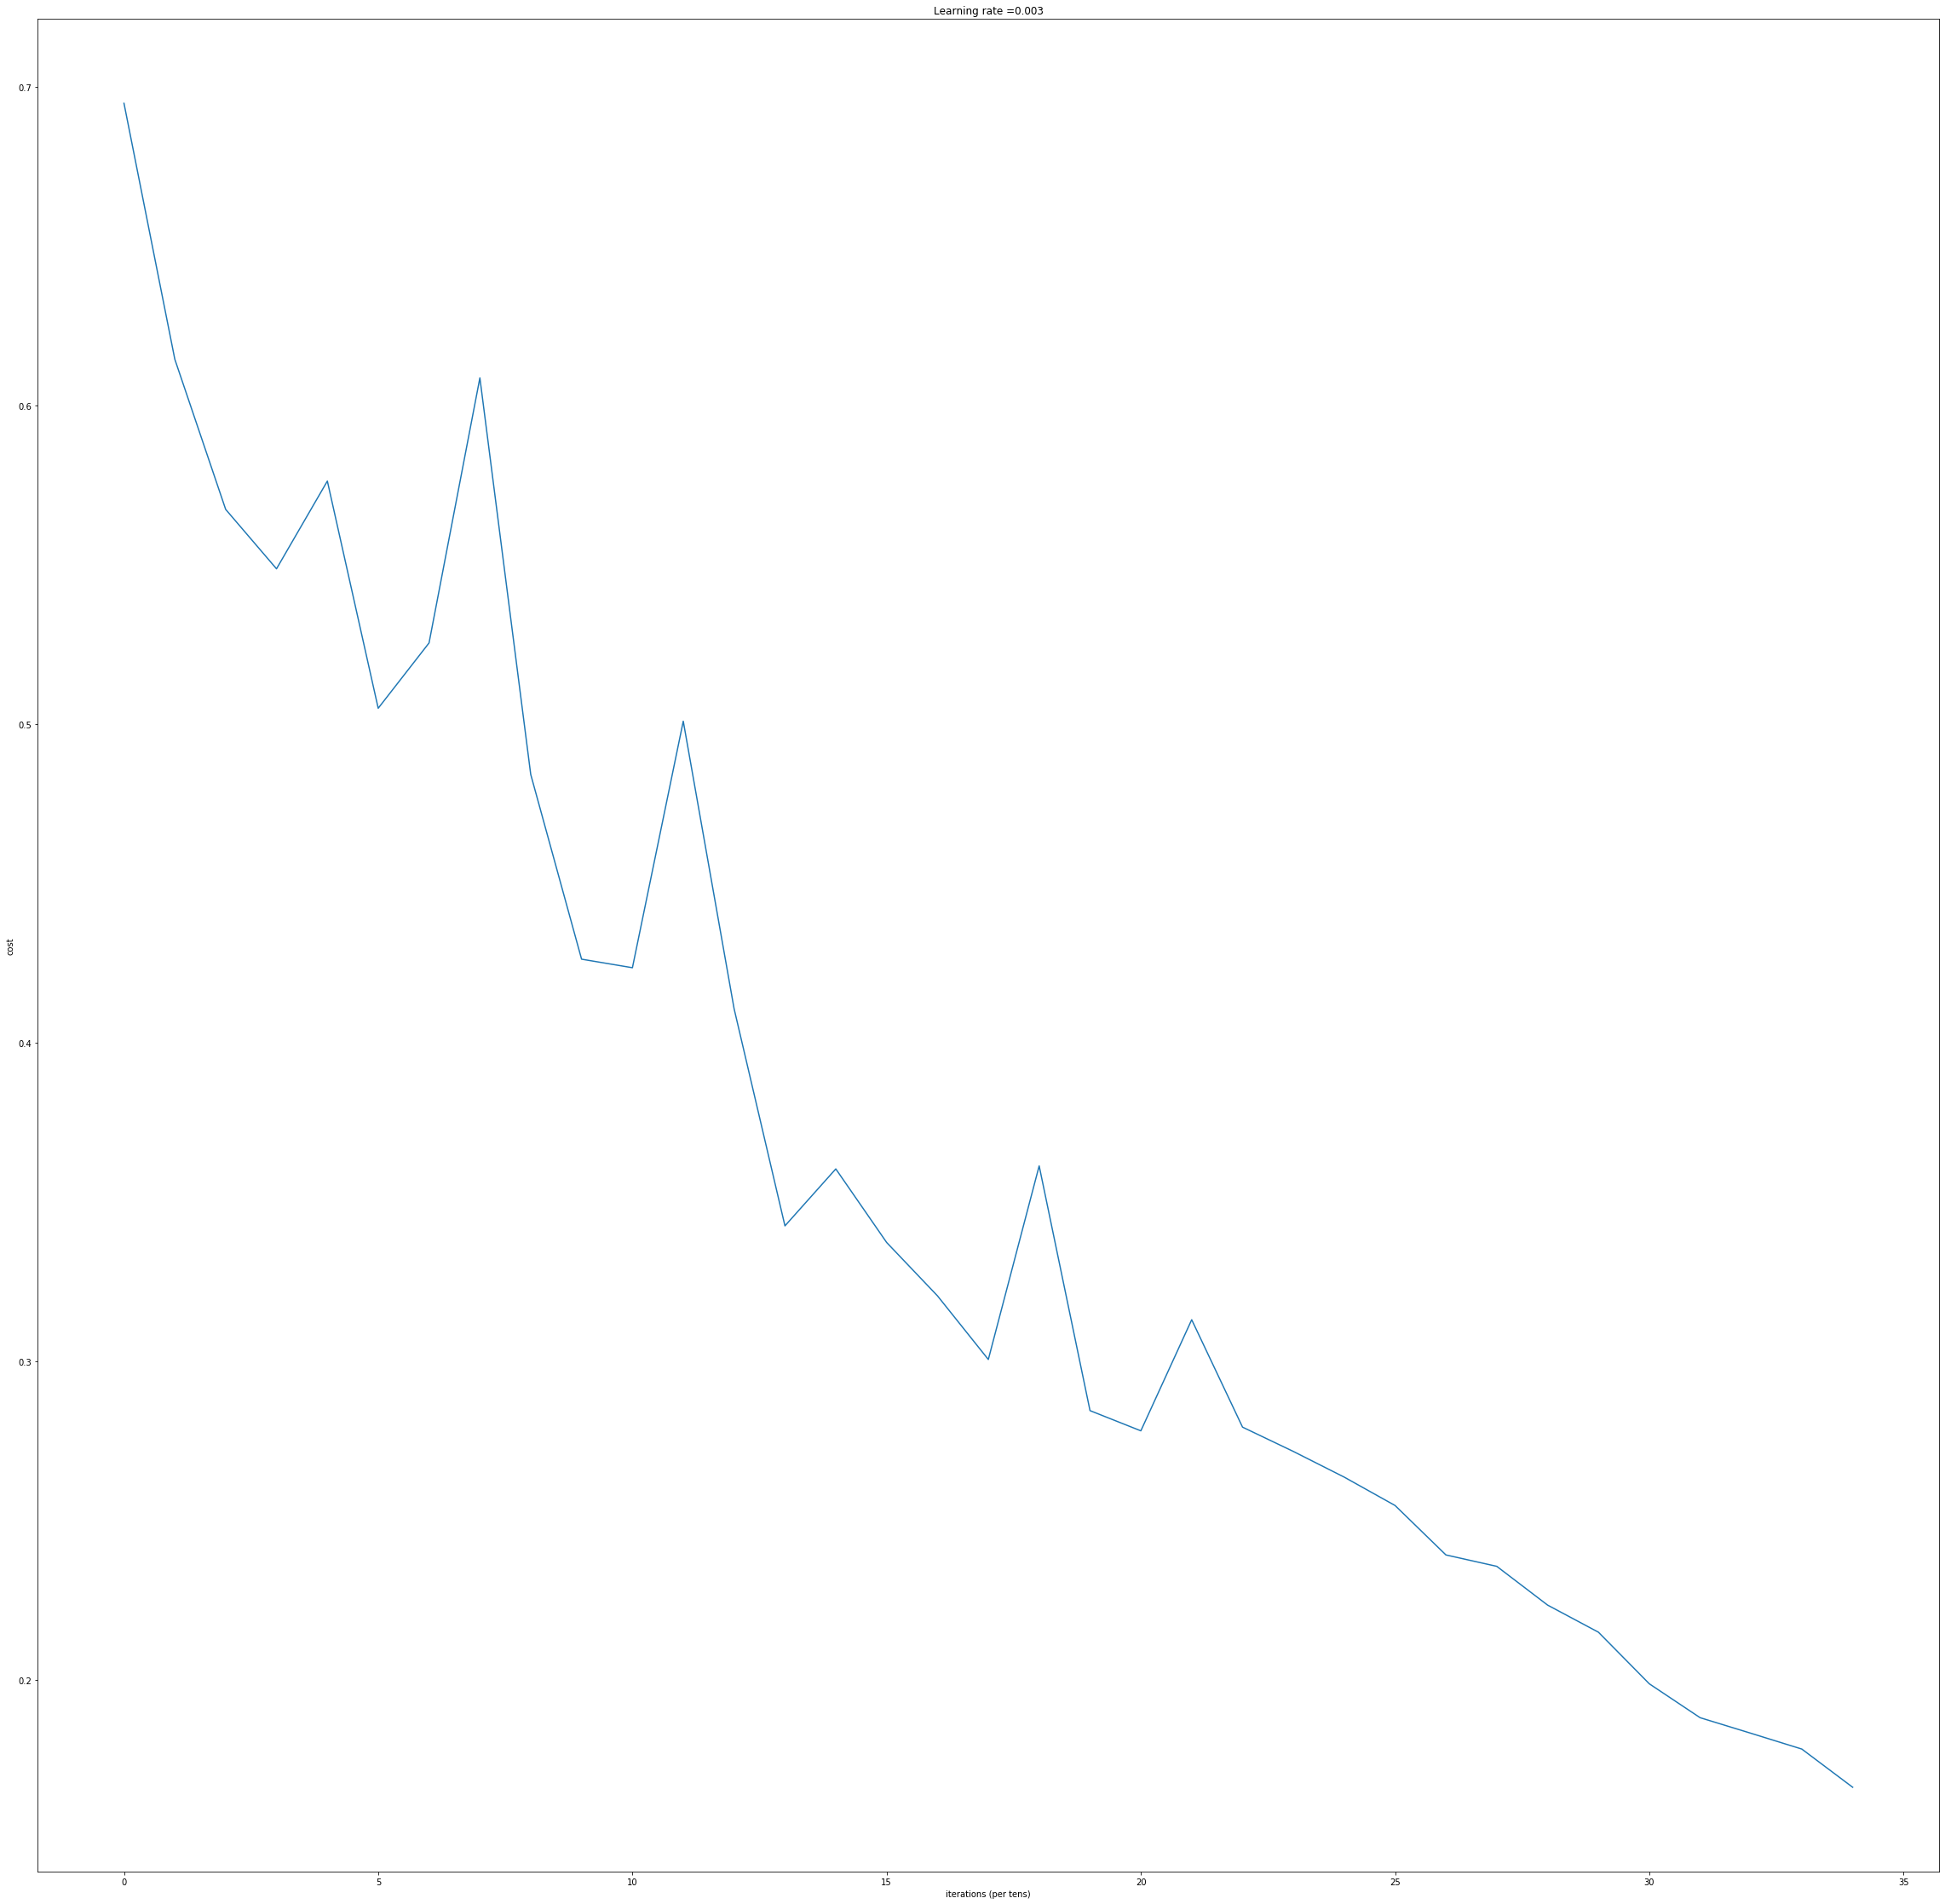

In [24]:
parameters = L_layer_model(train_x, train_y, {"x": dev_x, "y": dev_y} , layers_dims, learning_rate = 0.003, num_iterations = 3500)

print("Predicting train set....")
predictions_train = predict(train_x, train_y, parameters)

print("\nPredicting test set....")
predictions_test = predict(test_x, test_y, parameters)

print("\nPredicting dev set....")
predictions_dev = predict(dev_x, dev_y, parameters)

#print_mislabeled_images(["female", "male"], test_x, test_y, predictions_test)

Results: 
 - Train set accuracy is 0.9546436285097191
 - **Test set accuracy is 0.8994974874371862**
 - Dev set accuracy is 0.8928571428571426
 
 Here we can see that we have reached ~10% test set error, which is what we were aiming for! 